# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data= pd.read_csv('Categorical.csv')
data.head(5)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [9]:
data1= data.drop(['name'], axis=1)
data1.head(5)

,Longitude,Latitude,continent
0,-69.982677,12.520880,North America
1,66.004734,33.835231,Asia
2,17.537368,-12.293361,Africa
3,-63.064989,18.223959,North America
4,20.049834,41.142450,Europe


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [11]:
data_mapped= data1.copy()
data_mapped['continent']= data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,2
2,17.537368,-12.293361,3
3,-63.064989,18.223959,0
4,20.049834,41.142450,1
5,19.953288,60.214887,1
6,1.560544,42.542291,1
7,54.300167,23.905282,2
8,-65.179807,-35.381349,4
9,44.929933,40.289526,2


## Select the features

In [21]:
x= data_mapped.iloc[:,2:4]
x.head(5)

,continent
0,0
1,2
2,3
3,0
4,1


## Clustering

Use 4 clusters initially.

In [22]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [23]:
identified_cluster=kmeans.fit_predict(x)
identified_cluster

array([1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 0, 0, 0, 0, 1, 0, 1, 3, 2, 1, 2, 2,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 2, 1, 2, 3, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 3, 3, 1, 3, 1, 1, 1, 3,
       3, 3, 3, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 2, 2, 1, 1, 3, 2, 1, 1, 1,
       3, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 3, 1, 3, 0, 2, 2, 1, 0, 2, 3,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 3, 0, 0, 3, 3, 1, 0, 2, 3, 0, 0, 1, 1,
       3, 1, 2, 3, 0, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 3, 1, 2, 2, 3, 3, 3, 3, 0, 1, 2,
       3, 3, 2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2])

In [26]:
data_with_cluster=data_mapped.copy()
data_with_cluster['cluster']= identified_cluster
data_with_cluster

,Longitude,Latitude,continent,cluster
0,-69.982677,12.520880,0,1
1,66.004734,33.835231,2,3
2,17.537368,-12.293361,3,2
3,-63.064989,18.223959,0,1
4,20.049834,41.142450,1,1
5,19.953288,60.214887,1,1
6,1.560544,42.542291,1,1
7,54.300167,23.905282,2,3
8,-65.179807,-35.381349,4,2
9,44.929933,40.289526,2,3


## Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

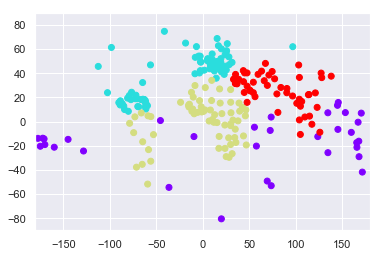

In [27]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c= data_with_cluster['cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.